# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

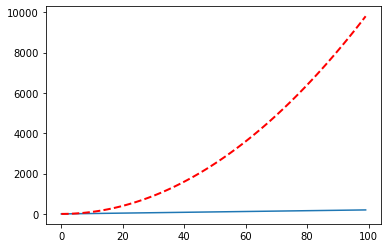

In [3]:
# Method 1
plt.plot(x, y)
plt.plot(x, z, 'r--', linewidth= 2.0)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

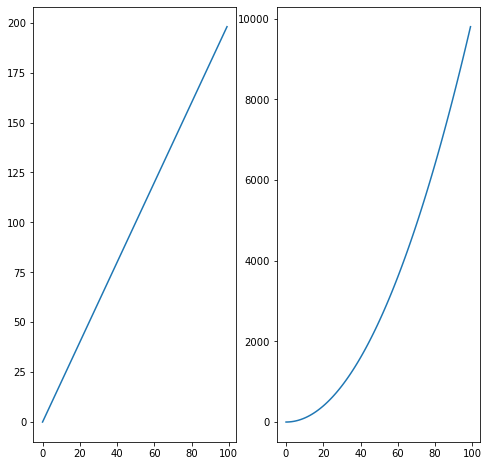

In [4]:
# Method 2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
ax[0].plot(x, y)
ax[1].plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

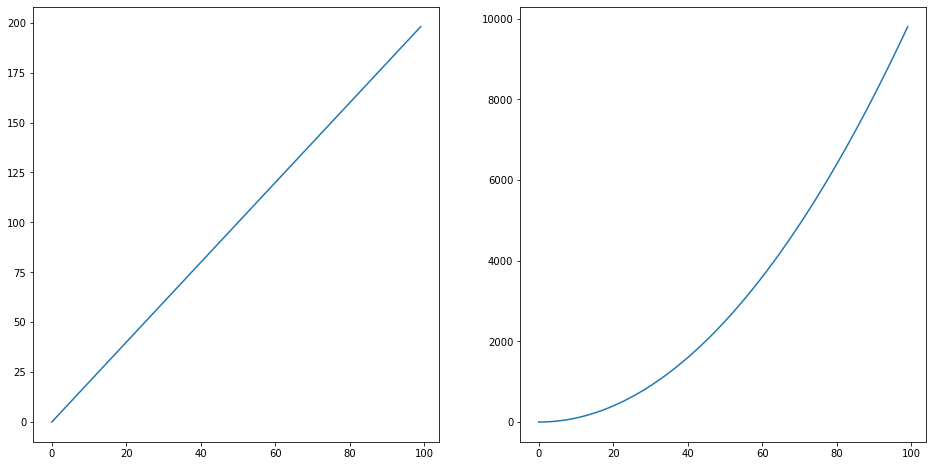

In [5]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].plot(x, y)
ax[1].plot(x, z)

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

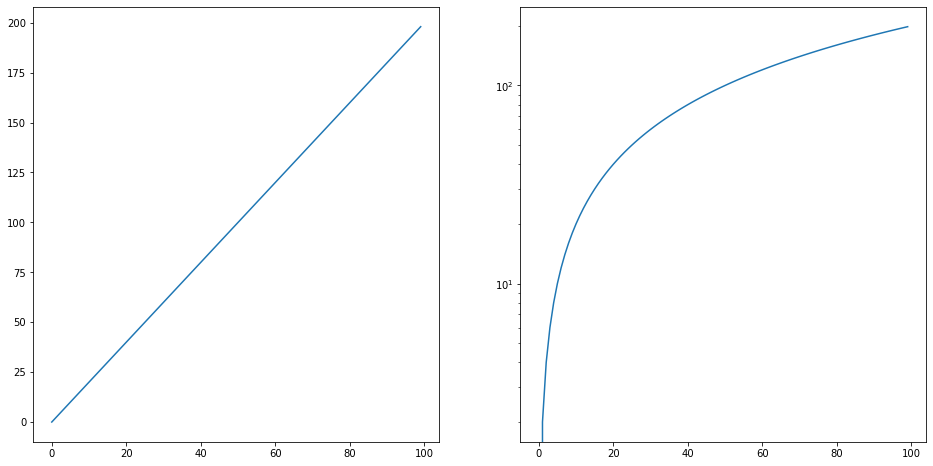

In [6]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].plot(x, y, label='y=x^2')
ax[1].plot(x, y, label='y=e^x')
ax[1].set_yscale('log')

#### As a bonus challenge, try to add a legend to the plot.

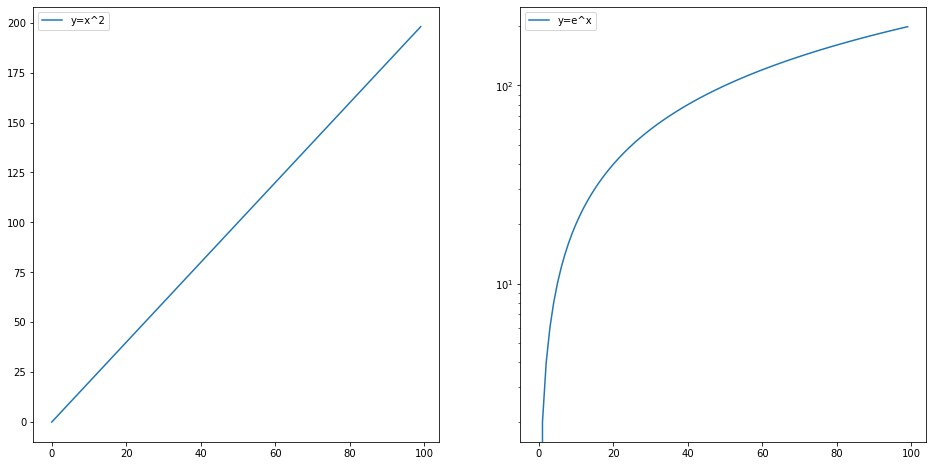

In [7]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].plot(x, y, label='y=x^2')
ax[1].plot(x, y, label='y=e^x')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('../data/fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

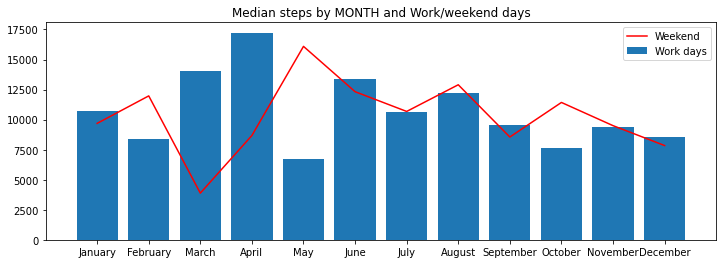

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

median_steps_month = fitbit[['Steps', 'Work_or_Weekend','Months_encoded','Months',]].groupby(['Months', 'Work_or_Weekend']).median().reset_index().sort_values(by=['Months_encoded'])
median_steps_workdays = median_steps_month[median_steps_month['Work_or_Weekend'] == 1][['Months', 'Steps']]
median_steps_weekend = median_steps_month[median_steps_month['Work_or_Weekend'] == 0][['Months', 'Steps']]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
ax.bar(median_steps_workdays['Months'], median_steps_workdays['Steps'], label= 'Work days')
ax.plot(median_steps_weekend['Months'], median_steps_weekend['Steps'], label='Weekend', c='r')
ax.set_title('Median steps by MONTH and Work/weekend days')
ax.legend()

fig.savefig('../figures/Median steps.svg')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

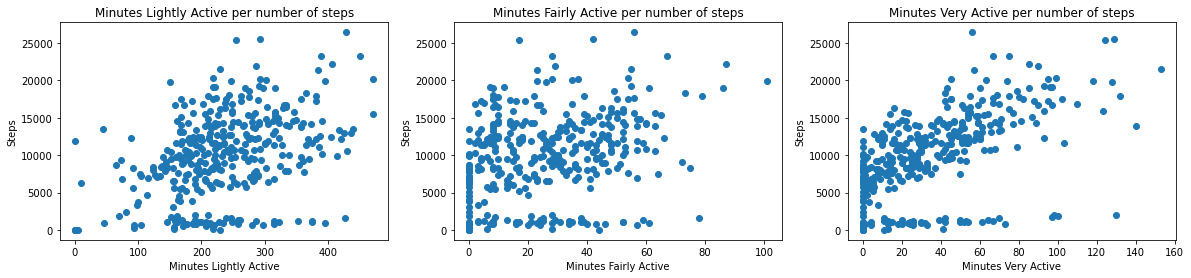

In [10]:
# your code here
scatter_loop = ['Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active']

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 4))
for index, array in enumerate(ax):
    ax[index].scatter(fitbit[f'{scatter_loop[index]}'], fitbit['Steps'])
    ax[index].set_title(f'{scatter_loop[index]} per number of steps')
    ax[index].set_xlabel(f'{scatter_loop[index]}')
    ax[index].set_ylabel('Steps')


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=np.number).columns.to_list()

['Unnamed: 0',
 'PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare']

In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=np.object).columns.to_list()

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
# your code here
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

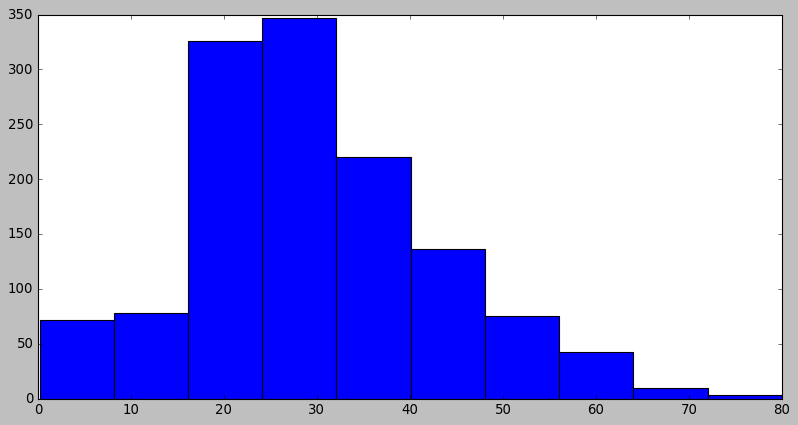

In [16]:
# your code here
figure, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
axes.hist(titanic['Age'], bins=10)


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

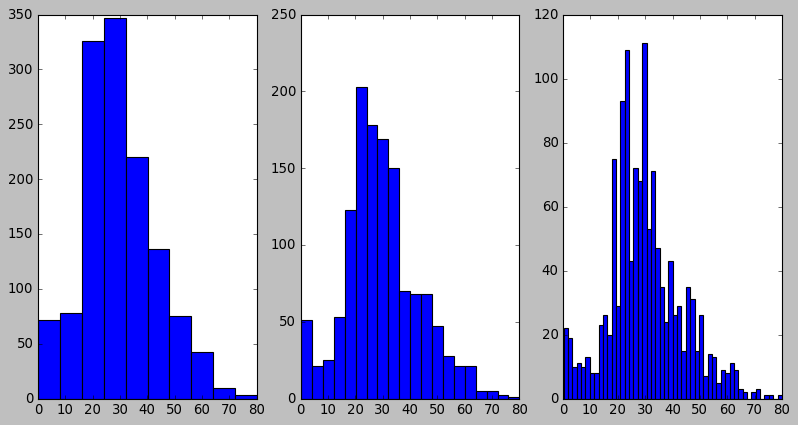

In [17]:
# your code here
figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 6))
axes[0].hist(titanic['Age'], bins=10)
axes[1].hist(titanic['Age'], bins=20)
axes[2].hist(titanic['Age'], bins=50)

#### How does the bin size affect your plot?

In [18]:
"""
your comments here

it shortens its height as peaks are spread onto more bins

"""

'\nyour comments here\n\nit shortens its height as peaks are spread onto more bins\n\n'

#### Use seaborn to show the distribution of column `Age`.

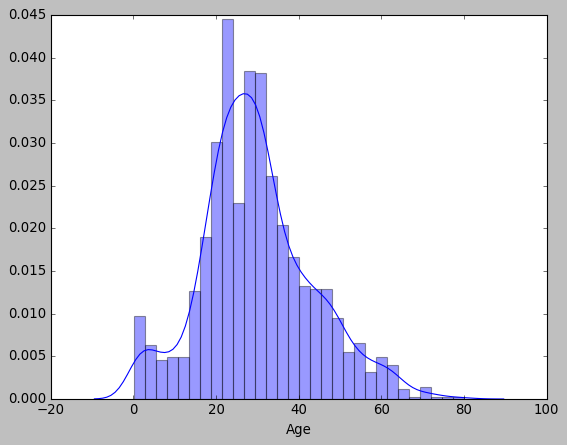

In [19]:
# your code here
import seaborn as sns
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 466.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

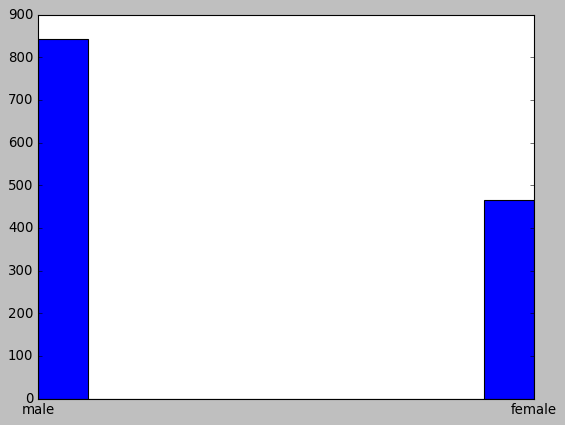

In [20]:
# Method 1 - matplotlib
plt.hist(titanic['Gender'])
# your code here

In [21]:
gen = titanic['Gender']

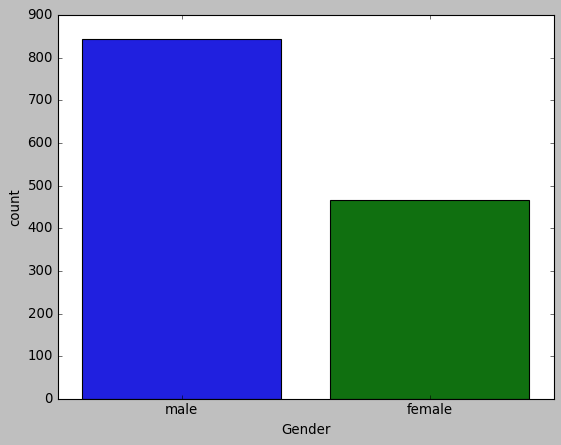

In [22]:
# Method 2 - seaborn

sns.countplot(x='Gender', data=titanic)
# your code here

#### Use the right plot to visualize the column `Pclass`.

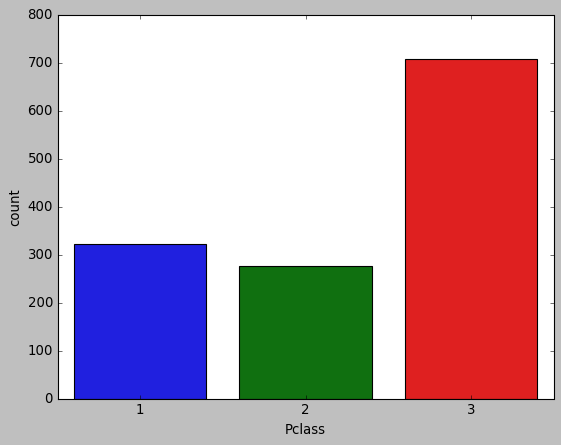

In [23]:
# your code here
sns.countplot(x='Pclass', data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [24]:
describe = titanic[['Age']].describe().reset_index()
describe = describe.drop([0])

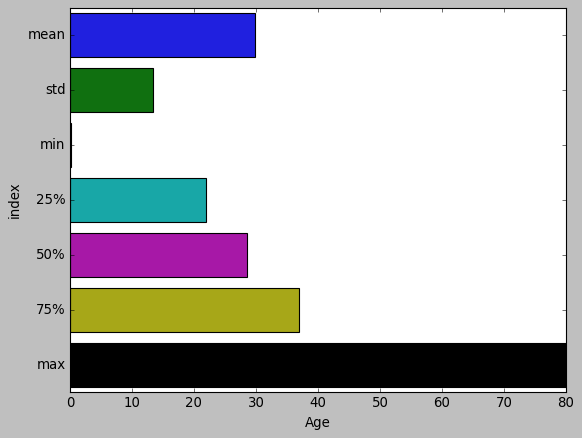

In [25]:
# your code here
sns.barplot(data=describe, y='index', x='Age')

In [26]:
"""
your comments here
"""


'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [27]:
"""
your comments here
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

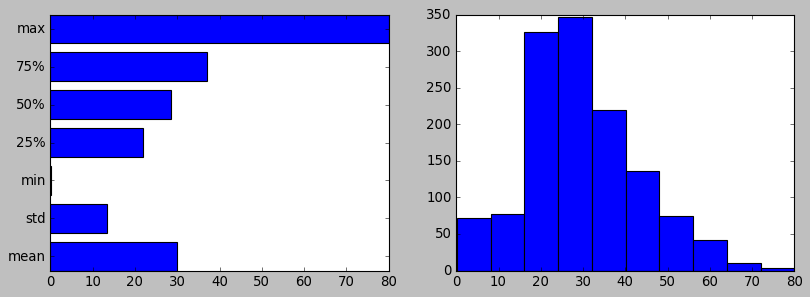

In [28]:
# your code here
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
ax[0].barh(describe['index'], describe['Age'], 0.75)
ax[1].hist(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [29]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [30]:
titanic['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

Text(0.5, 0, 'Fare')

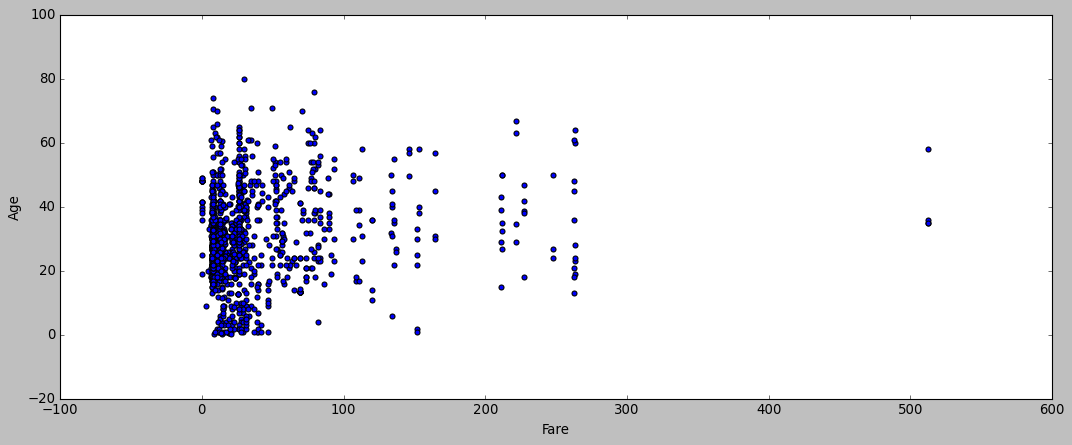

In [31]:
# Method 1 - matplotlib
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
ax.scatter(titanic['Fare'], titanic['Age'])
ax.set_ylabel('Age')
ax.set_xlabel('Fare')
# your code here

In [32]:
# Method 2 - seaborn
# your code here


#### Plot the correlation matrix using seaborn.

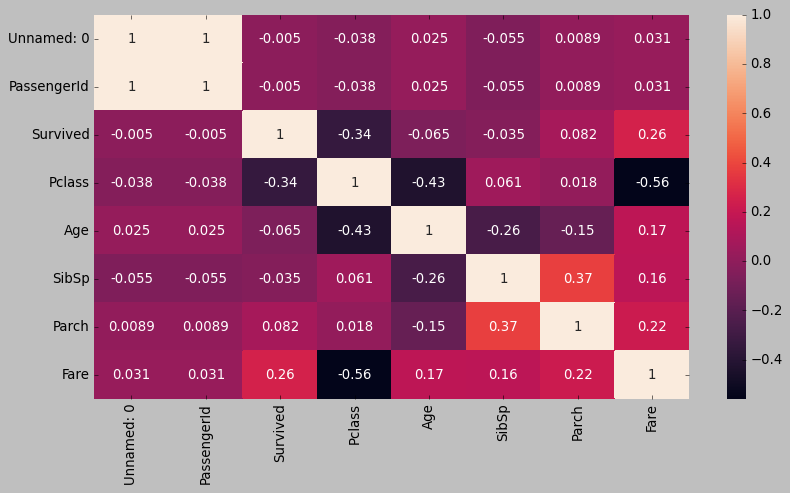

In [33]:
# your code here
figure, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
correl = titanic.corr()
ax = sns.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, annot=True)

#### What are the most correlated features?

In [34]:
"""
your comments here

black-looking cells from above
"""

'\nyour comments here\n\nblack-looking cells from above\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

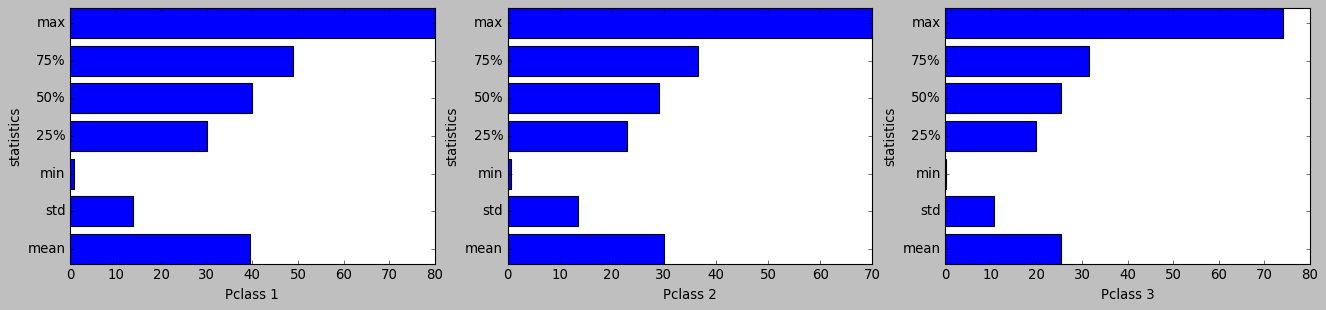

In [35]:
# your code here
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 4))

for index, elem in enumerate([1, 2, 3]):
    df = titanic[titanic['Pclass'] == elem]
    df = df['Age'].describe().reset_index()
    df = df.drop([0])
    ax[index].barh(df['index'], df['Age'])
    ax[index].set_xlabel(f'Pclass {elem}')
    ax[index].set_ylabel('statistics')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

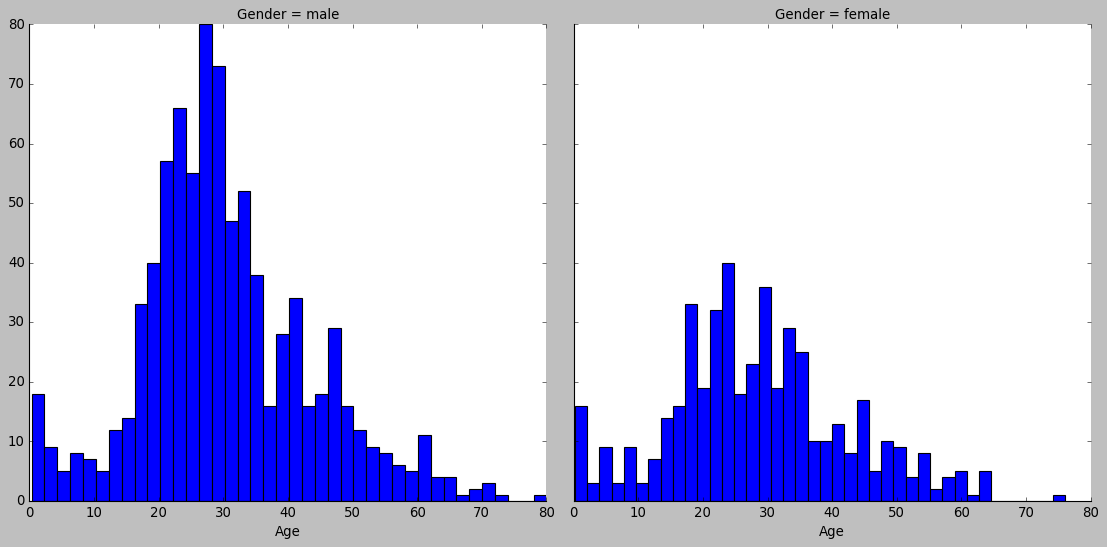

In [36]:
# your code here
figure = sns.FacetGrid(data=titanic, col='Gender', height=7)
figure.map(plt.hist, 'Age', bins=40)
plt.show()